# Imports

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import sklearn
import category_encoders as ce
import numpy as np
from keras.models import Sequential
from keras.layers import Input, Embedding, Flatten, Dense, concatenate, BatchNormalization
from keras.models import Model
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import LabelEncoder

import requests

# This code is to sort the scuffed data into dataframes

In [ ]:
import json
import pandas as pd

df = pd.read_json("https://raw.githubusercontent.com/peachfuzzz/bac-advanced-team/main/ugg_data_plat.json", orient = "index")

# View the first few rows of the dataframe
df.head(27)

,most_played_role,tier_top,win_rate_top,pick_rate_top,match_count_top,best_counter_top,ban_rate,tier_mid,win_rate_mid,pick_rate_mid,...,tier_adc,win_rate_adc,pick_rate_adc,match_count_adc,best_counter_adc,tier_support,win_rate_support,pick_rate_support,match_count_support,best_counter_support
Riven,top,A,50.80%,5.2%,54176,Maokai,1.8%,?,50.63%,0.3%,...,?,63.49%,0.0%,63,Vayne,?,37.23%,0.0%,94,Swain
Kindred,jungle,?,46.59%,0.0%,249,Gragas,4.3%,?,47.27%,0.0%,...,?,53.42%,0.1%,614,Karthus,?,60.61%,0.0%,33,Soraka
Shyvana,jungle,?,48.79%,0.2%,2441,Teemo,0.2%,?,51.56%,0.1%,...,?,60.00%,0.0%,5,Lucian,?,33.33%,0.0%,18,Sona
Taric,support,?,47.02%,0.0%,521,Aatrox,0.2%,?,53.56%,0.0%,...,?,57.78%,0.0%,45,Sivir,A,52.38%,1.5%,16123,Vel'Koz
Fiora,top,S+,50.26%,6.5%,67870,Malphite,14.9%,?,51.95%,0.1%,...,?,57.14%,0.0%,35,Varus,?,41.07%,0.0%,56,Fiddlesticks
Fiddlesticks,jungle,?,50.07%,0.1%,699,Akshan,4.9%,?,56.96%,0.1%,...,?,45.16%,0.0%,31,Sion,?,51.15%,0.5%,4997,Maokai
Swain,support,?,51.08%,0.3%,3487,Sylas,1.0%,A,51.78%,1.1%,...,?,56.85%,0.3%,3548,Seraphine,B,48.65%,2.6%,26853,Heimerdinger
Taliyah,mid,?,55.72%,0.0%,201,Kled,0.4%,A,50.94%,1.7%,...,?,48.27%,0.0%,433,Ziggs,?,49.27%,0.2%,1786,Karma
Bel'Veth,jungle,?,49.19%,0.1%,931,Kled,4.7%,?,55.47%,0.0%,...,?,50.00%,0.0%,42,Karthus,?,47.73%,0.2%,1829,Bard
Zilean,support,?,55.16%,0.1%,611,Gwen,1.0%,?,52.57%,0.4%,...,?,52.84%,0.0%,229,Seraphine,A,50.55%,2.9%,30693,Rell


In [ ]:
df.dtypes

most_played_role         object
tier_top                 object
win_rate_top             object
pick_rate_top            object
match_count_top           int64
best_counter_top         object
ban_rate                 object
tier_mid                 object
win_rate_mid             object
pick_rate_mid            object
match_count_mid           int64
best_counter_mid         object
tier_jungle              object
win_rate_jungle          object
pick_rate_jungle         object
match_count_jungle      float64
best_counter_jungle      object
tier_adc                 object
win_rate_adc             object
pick_rate_adc            object
match_count_adc           int64
best_counter_adc         object
tier_support             object
win_rate_support         object
pick_rate_support        object
match_count_support       int64
best_counter_support     object
dtype: object

In [ ]:
for col in df:
    if 'rate' in col:
        df[col] = df[col].apply(lambda x: float(str(x).strip("%")))

In [ ]:
df['total_match_count'] = df['match_count_adc'] + df['match_count_jungle'] + df['match_count_mid'] + df['match_count_support'] + df['match_count_top']

In [ ]:
len(df.index)
df.dtypes

most_played_role         object
tier_top                 object
win_rate_top            float64
pick_rate_top           float64
match_count_top           int64
best_counter_top         object
ban_rate                float64
tier_mid                 object
win_rate_mid            float64
pick_rate_mid           float64
match_count_mid           int64
best_counter_mid         object
tier_jungle              object
win_rate_jungle         float64
pick_rate_jungle        float64
match_count_jungle      float64
best_counter_jungle      object
tier_adc                 object
win_rate_adc            float64
pick_rate_adc           float64
match_count_adc           int64
best_counter_adc         object
tier_support             object
win_rate_support        float64
pick_rate_support       float64
match_count_support       int64
best_counter_support     object
total_match_count       float64
dtype: object

In [ ]:
top_df = df[['tier_top','win_rate_top', 'pick_rate_top', 'match_count_top', 'best_counter_top', 'ban_rate']]
top_df = top_df[top_df['tier_top'] != '?']
top_df['win_rate_diff'] = top_df['win_rate_top'] - 50
top_df.head()

,tier_top,win_rate_top,pick_rate_top,match_count_top,best_counter_top,ban_rate,win_rate_diff
Riven,A,50.80,5.2,54176,Maokai,1.8,0.80
Fiora,S+,50.26,6.5,67870,Malphite,14.9,0.26
Quinn,A,52.29,1.0,10292,Maokai,0.4,2.29
Tahm Kench,B,49.98,1.6,16648,Singed,0.4,-0.02
Shen,S,51.71,4.5,47680,Akshan,0.8,1.71


In [ ]:
jungle_df = df[['tier_jungle','win_rate_jungle', 'pick_rate_jungle', 'match_count_jungle', 'best_counter_jungle', 'ban_rate']]
jungle_df = jungle_df[jungle_df['tier_jungle'] != '?']
jungle_df['win_rate_diff'] = jungle_df['win_rate_jungle'] - 50
jungle_df.head()

,tier_jungle,win_rate_jungle,pick_rate_jungle,match_count_jungle,best_counter_jungle,ban_rate,win_rate_diff
Kindred,S,51.21,4.2,44155.0,Rammus,4.3,1.21
Shyvana,B,49.06,1.6,16470.0,Rek'Sai,0.2,-0.94
Fiddlesticks,S,52.23,3.9,40942.0,Volibear,4.9,2.23
Taliyah,B,51.99,0.6,6191.0,Udyr,0.4,1.99
Bel'Veth,S,51.14,2.9,30721.0,Rek'Sai,4.7,1.14


In [ ]:
mid_df = df[['tier_mid','win_rate_mid', 'pick_rate_mid', 'match_count_mid', 'best_counter_mid', 'ban_rate']]
mid_df = mid_df[mid_df['tier_mid'] != '?']
mid_df['win_rate_diff'] = mid_df['win_rate_mid'] - 50
mid_df.head()

,tier_mid,win_rate_mid,pick_rate_mid,match_count_mid,best_counter_mid,ban_rate,win_rate_diff
Swain,A,51.78,1.1,11625,Cassiopeia,1.0,1.78
Taliyah,A,50.94,1.7,17508,Xerath,0.4,0.94
Vex,S+,51.14,3.8,39740,Swain,5.2,1.14
Anivia,S+,52.52,3.2,33964,Vel'Koz,6.0,2.52
Annie,S+,52.52,3.9,40575,Viktor,8.1,2.52


In [ ]:
adc_df = df[['tier_adc','win_rate_adc', 'pick_rate_adc', 'match_count_adc', 'best_counter_adc', 'ban_rate']]
adc_df = adc_df[adc_df['tier_adc'] != '?']
adc_df['win_rate_diff'] = adc_df['win_rate_adc'] - 50
adc_df.head()

,tier_adc,win_rate_adc,pick_rate_adc,match_count_adc,best_counter_adc,ban_rate,win_rate_diff
Karthus,S,54.23,1.1,11124,Seraphine,3.1,4.23
Jinx,S+,51.22,27.6,290164,Karthus,10.5,1.22
Varus,B,49.98,8.2,86152,Nilah,1.9,-0.02
Seraphine,A,53.68,1.0,11018,Kalista,0.4,3.68
Ziggs,A,53.03,0.8,7979,Karthus,0.1,3.03


In [ ]:
support_df = df[['tier_support','win_rate_support', 'pick_rate_support', 'match_count_support', 'best_counter_support', 'ban_rate']]
support_df = support_df[support_df['tier_support'] != '?']
support_df['win_rate_diff'] = support_df['win_rate_support'] - 50
support_df.head()

,tier_support,win_rate_support,pick_rate_support,match_count_support,best_counter_support,ban_rate,win_rate_diff
Taric,A,52.38,1.5,16123,Vel'Koz,0.2,2.38
Swain,B,48.65,2.6,26853,Heimerdinger,1.0,-1.35
Zilean,A,50.55,2.9,30693,Rell,1.0,0.55
Annie,S,51.45,2.7,28834,Shaco,8.1,1.45
Tahm Kench,B,48.90,0.6,5981,Rell,0.4,-1.10


# Visualization examples

In [ ]:
import matplotlib.pyplot as plt
plt.close("all")

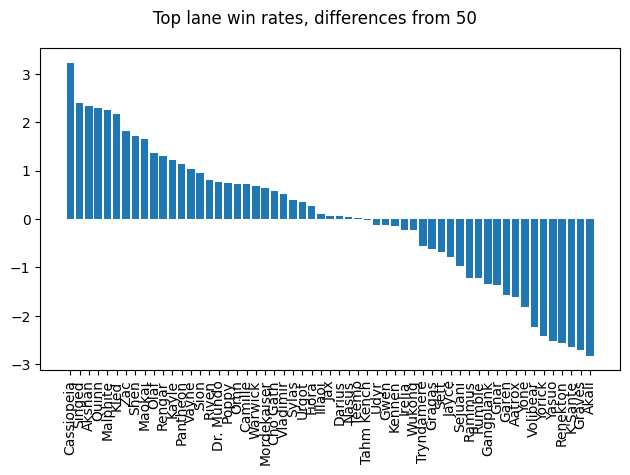

In [ ]:
plt.figure();

plt.rcParams['figure.figsize'] = (20, 6)
plt.suptitle('Top lane win rates, differences from 50')

#sorting the dataframe real quick

sorted_top = top_df.sort_values(by = 'win_rate_diff', ascending=False)
plt.bar(sorted_top.index, sorted_top['win_rate_diff'])
plt.xticks(rotation = 'vertical')
plt.tight_layout()
ax = plt.gca()
plt.show()

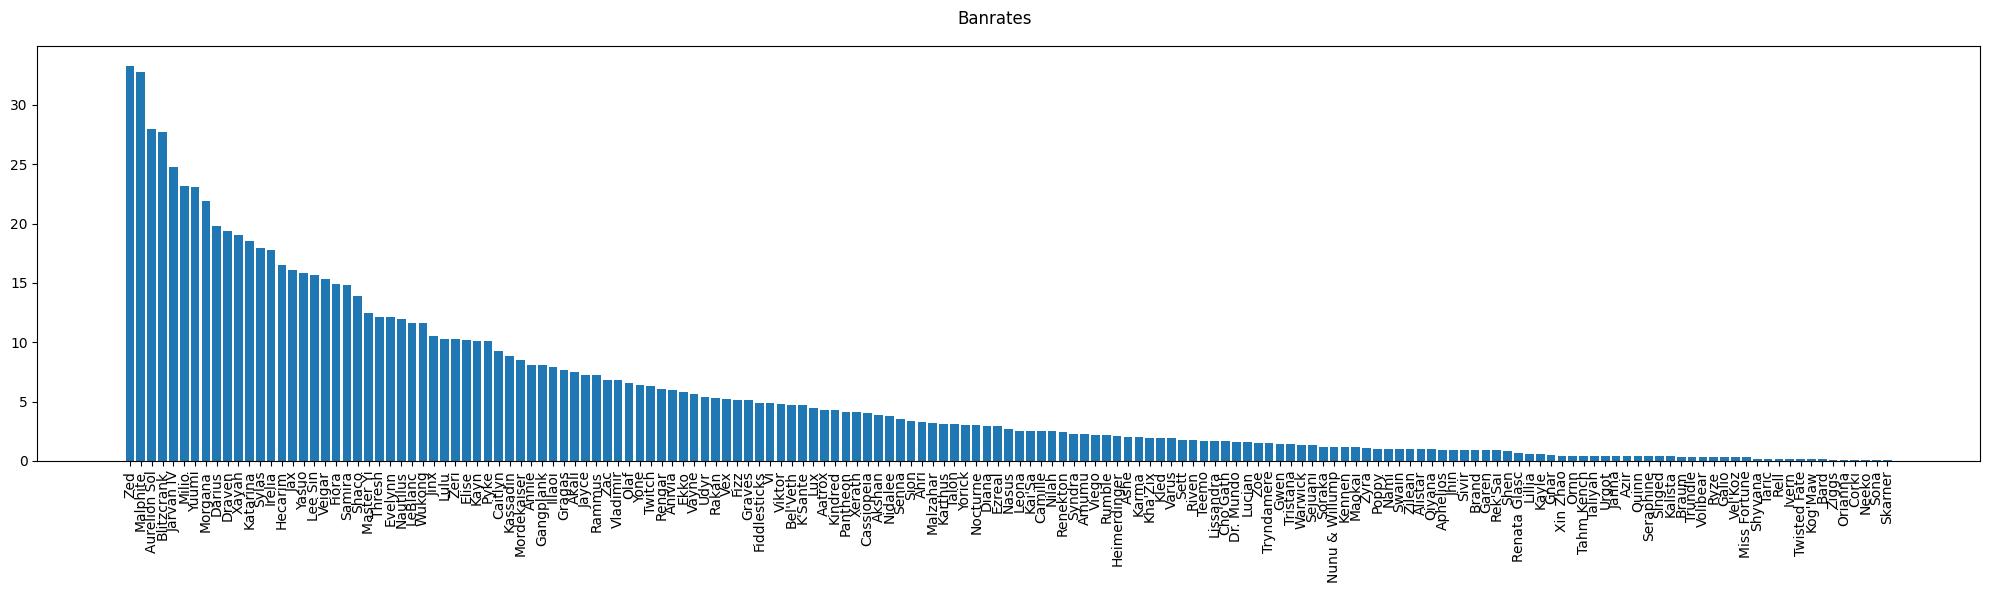

In [ ]:
plt.figure();

plt.rcParams['figure.figsize'] = (25, 6)
plt.suptitle('Banrates')

#sorting the dataframe real quick

sorted_df = df.sort_values(by = 'ban_rate', ascending=False)
plt.bar(sorted_df.index, sorted_df['ban_rate'])
plt.xticks(rotation = 'vertical')
plt.tight_layout()
ax = plt.gca()
plt.show()

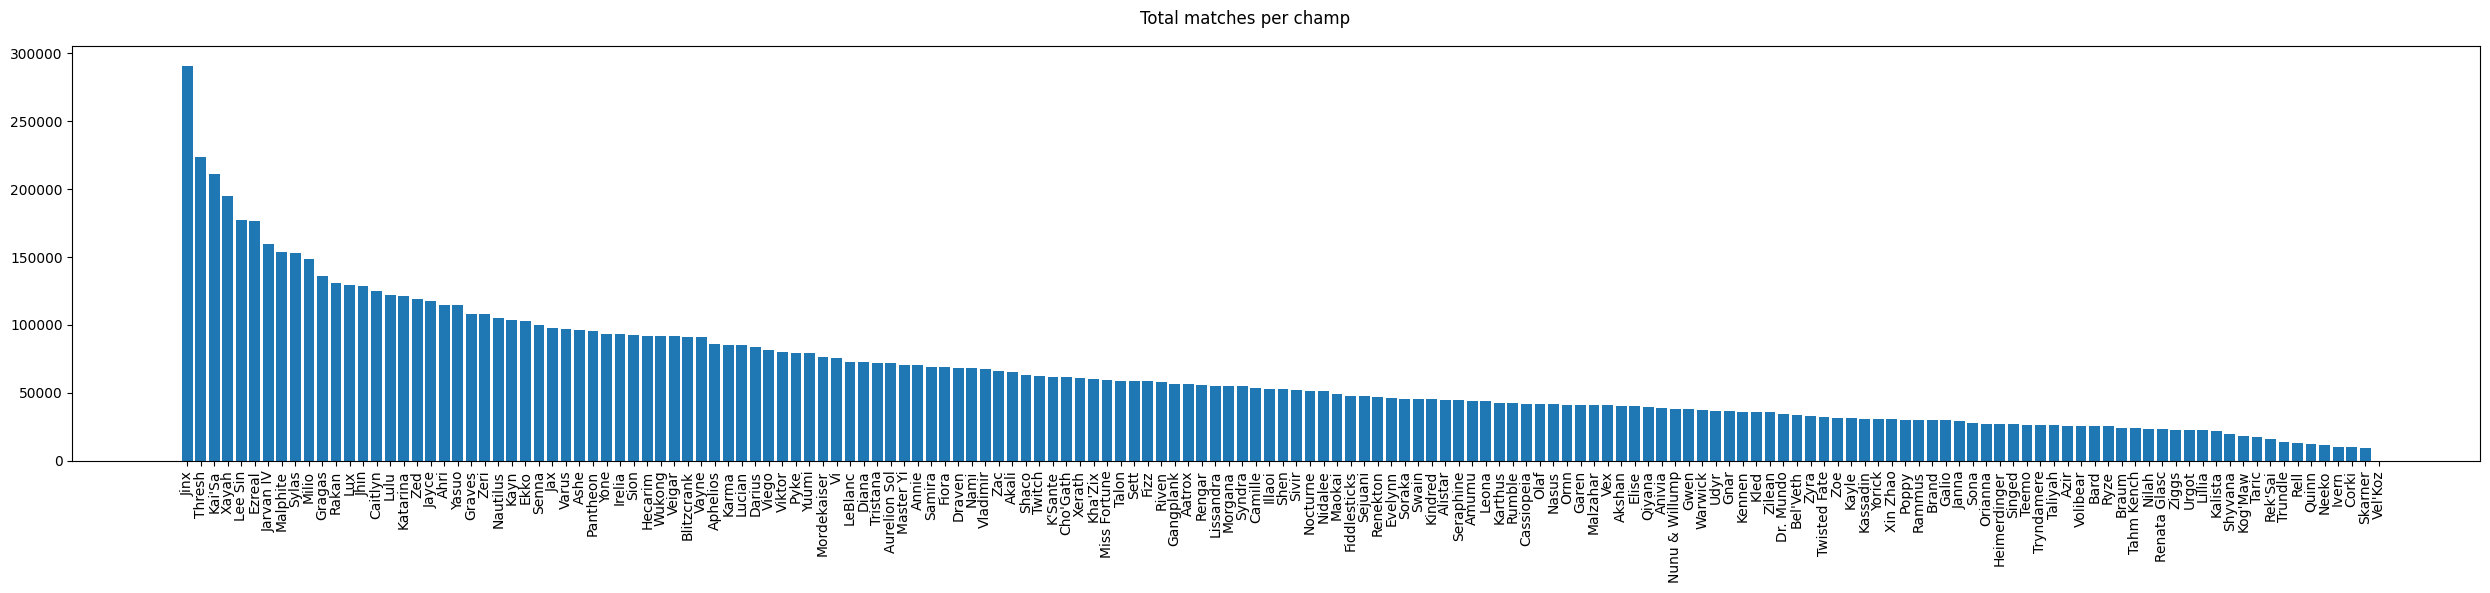

In [ ]:
plt.figure();

plt.rcParams['figure.figsize'] = (25, 6)
plt.suptitle('Total matches per champ')

#sorting the dataframe real quick

sorted_df = df.sort_values(by = 'total_match_count', ascending=False)
plt.bar(sorted_df.index, sorted_df['total_match_count'])
plt.xticks(rotation = 'vertical')
plt.tight_layout()
ax = plt.gca()
plt.show()

# Accessing Riot API data (do not run)

In [ ]:
import requests
key = '[insert key here :3]'

## Mostly testing stuff

In [ ]:
# This code requests all the players currently in challenger

# Do not share, needs manual updating once a day

url = f'https://na1.api.riotgames.com/lol/league/v4/challengerleagues/by-queue/RANKED_SOLO_5x5?api_key={key}'

parameters = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9",
    "Accept-Charset": "application/x-www-form-urlencoded; charset=UTF-8",
    "Origin": "https://developer.riotgames.com"
}

resp = requests.get(url, params=parameters)
data = resp.json()

challenger_df = pd.DataFrame.from_dict(data)

In [ ]:
challenger_df

,tier,leagueId,queue,name,entries
0,CHALLENGER,9c8422dd-4fce-344c-832e-e907c73f7935,RANKED_SOLO_5x5,Fiora's Warlords,{'summonerId': 'gGidwUWS05fEVU82Sbl9hETdsx78Fm...
1,CHALLENGER,9c8422dd-4fce-344c-832e-e907c73f7935,RANKED_SOLO_5x5,Fiora's Warlords,{'summonerId': 'fIlJex7TsSRZPUm_G2lHIPtZf38u_D...
2,CHALLENGER,9c8422dd-4fce-344c-832e-e907c73f7935,RANKED_SOLO_5x5,Fiora's Warlords,{'summonerId': 'ZWgymnG6DDo8kcgl7g81Q9EC__wjNE...
3,CHALLENGER,9c8422dd-4fce-344c-832e-e907c73f7935,RANKED_SOLO_5x5,Fiora's Warlords,{'summonerId': 'iOPwfjsiHYH4BYnhjKvf1ebYMYN8qp...
4,CHALLENGER,9c8422dd-4fce-344c-832e-e907c73f7935,RANKED_SOLO_5x5,Fiora's Warlords,{'summonerId': 'wfSoCP5bszN4jsVuKmMSwFb9ioVU1v...
...,...,...,...,...,...
295,CHALLENGER,9c8422dd-4fce-344c-832e-e907c73f7935,RANKED_SOLO_5x5,Fiora's Warlords,{'summonerId': '335MxPbABryrz8MhsHOzIAkw3cd3tQ...
296,CHALLENGER,9c8422dd-4fce-344c-832e-e907c73f7935,RANKED_SOLO_5x5,Fiora's Warlords,{'summonerId': '32c03jnSJxIi3gQcr_jWv_gNEkdMR0...
297,CHALLENGER,9c8422dd-4fce-344c-832e-e907c73f7935,RANKED_SOLO_5x5,Fiora's Warlords,{'summonerId': 'M_Rc3uXo98MyVBZNTl4qtxDCQWLMBu...
298,CHALLENGER,9c8422dd-4fce-344c-832e-e907c73f7935,RANKED_SOLO_5x5,Fiora's Warlords,{'summonerId': 'Lu6t0On2Z5l9PqHs2BTtilDkfeS4Rh...


In [ ]:
# this code accesses a player from challenger for their puuid
summoner_ID = 'gGidwUWS05fEVU82Sbl9hETdsx78Fmo2W4-Fjg-5r3Dnnd0Sc8nNGFYQBw'

summoner_req_url = f'https://na1.api.riotgames.com/lol/summoner/v4/summoners/{summoner_ID}?api_key={key}'

resp = requests.get(summoner_req_url, params=parameters)
summoner_data = resp.json()

In [ ]:
summoner_data

{'id': 'gGidwUWS05fEVU82Sbl9hETdsx78Fmo2W4-Fjg-5r3Dnnd0Sc8nNGFYQBw',
 'accountId': 'Co0XFCTibDfVeyYGUQwlomdxDoiA68o7JIEl9_Pp5abiaTvkcWzKM8hd',
 'puuid': '-rNnab55w3q1MtgYevs5YnuOOAyzP4Khr-1RSIaVntpMbz7_usSZI-bmK9zMgNgywrtP1eA6h8A2rw',
 'name': 'PWVlaozhoudl',
 'profileIconId': 907,
 'revisionDate': 1681519897000,
 'summonerLevel': 52}

In [ ]:
# this code accesses the match history of the specificed player above
# ranked, lastest 20 games

puuid = summoner_data['puuid']

match_history_url = f'https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids?type=ranked&start=0&count=20&api_key={key}'

resp = requests.get(match_history_url, params=parameters)
match_history_data = resp.json()

In [ ]:
match_history_data

['NA1_4627054560',
 'NA1_4627047647',
 'NA1_4627047119',
 'NA1_4627035776',
 'NA1_4627006605',
 'NA1_4626997942',
 'NA1_4626743411',
 'NA1_4622424423',
 'NA1_4622413904',
 'NA1_4622382581',
 'NA1_4622372102',
 'NA1_4622329973',
 'NA1_4622292398',
 'NA1_4619818127',
 'NA1_4619805065',
 'NA1_4619798862',
 'NA1_4619540291',
 'NA1_4619491766',
 'NA1_4619424095',
 'NA1_4619389967']

In [ ]:
# this code accesses an individual match of the match history of the player above

match_id = 'NA1_4627054560'

individual_match_url = f'https://americas.api.riotgames.com/lol/match/v5/matches/{match_id}?api_key={key}'

resp = requests.get(individual_match_url, params=parameters)
individual_match_data = resp.json()

In [ ]:
individual_match_data

{'metadata': {'dataVersion': '2',
  'matchId': 'NA1_4627054560',
  'participants': ['-rNnab55w3q1MtgYevs5YnuOOAyzP4Khr-1RSIaVntpMbz7_usSZI-bmK9zMgNgywrtP1eA6h8A2rw',
   'SOwd5I4A1x8SS65Kpd4abl3Yab3mWKWq7AQgTwuElOiTCBH_D4OnejjiReMhSANMWIDaOjReMKWnxw',
   '_NiQzm4v285Uu5gZPrm9DTXr3uDnWhGZb6lXUc8kczaVmmwCg0_HSpQxI6J9aHc0s7CkTWCMhWAOgQ',
   'ZjO_8xAcE2uhR_-yR2Qa9wGIl41uOMUUCeXlaXzRMKnUijPuc0ceG5110dL8f_evAB8JLpVi0QpIkw',
   'tAzExsW1c3lhFRyWwkI5tEQkM3pcStJ75kNrW3xm3yFLhm04MapfiWVFF77VldmHWYGUMluBV4_RKA',
   'Hlz0iJRFJR01m-z7vSUQ9xBfb3H9uvYVYYh9DfhBX-lRb8FC0RtDqwhOYDKViXk6jkMTiD1izmJ5-w',
   'f-AzGsYRdTZnSVMbqV6zmLgHavMUEqcuWQoFw6vqEoePbkB_Yro0KOX7VedjxofzjmeDNyf-6182sQ',
   'h1nvGe1iqgM-Vjsez7VnYpu5A8ThyfB0h2JPDP6NuretcyvoPsfR_rquiXtTmPjPNm2rv2wLH09QMg',
   'b8OORCrUHZd7NOepdAu7GD_WDNhgs-LoKcO48U4iu7IWjNdKOP_Z7saUXllpBc-E8jo76ZwMXKpthg',
   'kQJgkosMY7bjzC9M8PAxYniWuWfpRQf60DvGfwfc5sAbsDXVl46vIEm2D0XZowm3XgyZu7xJaDLMtQ']},
 'info': {'gameCreation': 1681214001880,
  'gameDuration': 2060,
  

## Code loop to request puuids (do not run if you do not have to)

In [ ]:
import time

In [ ]:
challenger_df

,tier,leagueId,queue,name,entries
0,CHALLENGER,9c8422dd-4fce-344c-832e-e907c73f7935,RANKED_SOLO_5x5,Fiora's Warlords,{'summonerId': 'gGidwUWS05fEVU82Sbl9hETdsx78Fm...
1,CHALLENGER,9c8422dd-4fce-344c-832e-e907c73f7935,RANKED_SOLO_5x5,Fiora's Warlords,{'summonerId': 'fIlJex7TsSRZPUm_G2lHIPtZf38u_D...
2,CHALLENGER,9c8422dd-4fce-344c-832e-e907c73f7935,RANKED_SOLO_5x5,Fiora's Warlords,{'summonerId': 'ZWgymnG6DDo8kcgl7g81Q9EC__wjNE...
3,CHALLENGER,9c8422dd-4fce-344c-832e-e907c73f7935,RANKED_SOLO_5x5,Fiora's Warlords,{'summonerId': 'iOPwfjsiHYH4BYnhjKvf1ebYMYN8qp...
4,CHALLENGER,9c8422dd-4fce-344c-832e-e907c73f7935,RANKED_SOLO_5x5,Fiora's Warlords,{'summonerId': 'wfSoCP5bszN4jsVuKmMSwFb9ioVU1v...
...,...,...,...,...,...
295,CHALLENGER,9c8422dd-4fce-344c-832e-e907c73f7935,RANKED_SOLO_5x5,Fiora's Warlords,{'summonerId': '335MxPbABryrz8MhsHOzIAkw3cd3tQ...
296,CHALLENGER,9c8422dd-4fce-344c-832e-e907c73f7935,RANKED_SOLO_5x5,Fiora's Warlords,{'summonerId': '32c03jnSJxIi3gQcr_jWv_gNEkdMR0...
297,CHALLENGER,9c8422dd-4fce-344c-832e-e907c73f7935,RANKED_SOLO_5x5,Fiora's Warlords,{'summonerId': 'M_Rc3uXo98MyVBZNTl4qtxDCQWLMBu...
298,CHALLENGER,9c8422dd-4fce-344c-832e-e907c73f7935,RANKED_SOLO_5x5,Fiora's Warlords,{'summonerId': 'Lu6t0On2Z5l9PqHs2BTtilDkfeS4Rh...


In [ ]:
# this function pulls the summoner id from the challenger dataframe
entry_series = challenger_df['entries']
entry_list = entry_series.to_list()
challenger_summoner_df = pd.DataFrame(entry_list)

In [ ]:
challenger_summoner_df

,summonerId,summonerName,leaguePoints,rank,wins,losses,veteran,inactive,freshBlood,hotStreak
0,gGidwUWS05fEVU82Sbl9hETdsx78Fmo2W4-Fjg-5r3Dnnd...,PWVlaozhoudl,907,I,116,86,False,False,False,False
1,fIlJex7TsSRZPUm_G2lHIPtZf38u_DRRriuczX7uWdlHCK...,EMENES,1145,I,238,205,False,False,True,False
2,ZWgymnG6DDo8kcgl7g81Q9EC__wjNE9cqNSVXIPZnuPkNMs,Chaeha,1024,I,153,124,False,False,False,False
3,iOPwfjsiHYH4BYnhjKvf1ebYMYN8qp2U9yHG5xodkvJY6gI,Josedeodo,1329,I,158,124,True,False,False,False
4,wfSoCP5bszN4jsVuKmMSwFb9ioVU1vW65kozk07wksGVJdg,Trickyyy,893,I,219,196,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...
295,335MxPbABryrz8MhsHOzIAkw3cd3tQi0B-0Dk19Z9qREeV...,fxrget my name,1070,I,138,115,False,False,False,False
296,32c03jnSJxIi3gQcr_jWv_gNEkdMR05NZZjh4qwas8zg_M...,kikï,941,I,129,117,False,False,True,False
297,M_Rc3uXo98MyVBZNTl4qtxDCQWLMBu7tdFRta7Cpn6SW7qs,LeGrosMax,900,I,151,129,False,False,True,True
298,Lu6t0On2Z5l9PqHs2BTtilDkfeS4RhgM9GKX8wSzqp_Tf5...,my kled mid acc,1024,I,113,76,False,False,False,True


In [ ]:
# pulls account information, including puuid, given a summoner_id
def pull_puuid(summoner_id):
  summoner_req_url = f'https://na1.api.riotgames.com/lol/summoner/v4/summoners/{summoner_id}?api_key={key}'
  resp = requests.get(summoner_req_url, params=parameters)
  summoner_data = resp.json()
  return summoner_data

In [ ]:
pull_puuid('fIlJex7TsSRZPUm_G2lHIPtZf38u_DRRriuczX7uWdlHCK83Jq9fUTrymA')

{'id': 'fIlJex7TsSRZPUm_G2lHIPtZf38u_DRRriuczX7uWdlHCK83Jq9fUTrymA',
 'accountId': 'ZJ0Ric_V6DAsEdVZa29-CdEBNiixKIX7WU-Re3PVKp84s2-R9pVBUhuv',
 'puuid': 'lvPNc_P63lTQSD6hPwMuSuleTLy-7lfoNZ2G3XgMLA7RUu6pUtebp2UA5gXdCcjpTFoABKbMr_1vRQ',
 'name': 'EMENES',
 'profileIconId': 29,
 'revisionDate': 1681719395023,
 'summonerLevel': 69}

In [ ]:
challenger_puuid_list = []
for i in range(300):
  puuid_return = pull_puuid(challenger_summoner_df.loc[i].at["summonerId"])
  print(challenger_summoner_df.loc[i].at["summonerId"])
  print(puuid_return)
  print(type(puuid_return))
  challenger_puuid_list.append(puuid_return)

  time.sleep(2)

gGidwUWS05fEVU82Sbl9hETdsx78Fmo2W4-Fjg-5r3Dnnd0Sc8nNGFYQBw
{'id': 'gGidwUWS05fEVU82Sbl9hETdsx78Fmo2W4-Fjg-5r3Dnnd0Sc8nNGFYQBw', 'accountId': 'Co0XFCTibDfVeyYGUQwlomdxDoiA68o7JIEl9_Pp5abiaTvkcWzKM8hd', 'puuid': '-rNnab55w3q1MtgYevs5YnuOOAyzP4Khr-1RSIaVntpMbz7_usSZI-bmK9zMgNgywrtP1eA6h8A2rw', 'name': 'PWVlaozhoudl', 'profileIconId': 907, 'revisionDate': 1681519897000, 'summonerLevel': 52}
<class 'dict'>
fIlJex7TsSRZPUm_G2lHIPtZf38u_DRRriuczX7uWdlHCK83Jq9fUTrymA
{'id': 'fIlJex7TsSRZPUm_G2lHIPtZf38u_DRRriuczX7uWdlHCK83Jq9fUTrymA', 'accountId': 'ZJ0Ric_V6DAsEdVZa29-CdEBNiixKIX7WU-Re3PVKp84s2-R9pVBUhuv', 'puuid': 'lvPNc_P63lTQSD6hPwMuSuleTLy-7lfoNZ2G3XgMLA7RUu6pUtebp2UA5gXdCcjpTFoABKbMr_1vRQ', 'name': 'EMENES', 'profileIconId': 29, 'revisionDate': 1681719395023, 'summonerLevel': 69}
<class 'dict'>
ZWgymnG6DDo8kcgl7g81Q9EC__wjNE9cqNSVXIPZnuPkNMs
{'id': 'ZWgymnG6DDo8kcgl7g81Q9EC__wjNE9cqNSVXIPZnuPkNMs', 'accountId': 'P6i7UeWPapZ-0Yh7I8UgCBrJhWwYYNUoVlX0b_sIPEghGA', 'puuid': 'fq_Fv6oZrdLfnJk1wG

In [ ]:
challenger_puuid_df = pd.DataFrame(challenger_puuid_list)
challenger_puuid_df

,id,accountId,puuid,name,profileIconId,revisionDate,summonerLevel
0,gGidwUWS05fEVU82Sbl9hETdsx78Fmo2W4-Fjg-5r3Dnnd...,Co0XFCTibDfVeyYGUQwlomdxDoiA68o7JIEl9_Pp5abiaT...,-rNnab55w3q1MtgYevs5YnuOOAyzP4Khr-1RSIaVntpMbz...,PWVlaozhoudl,907,1681519897000,52
1,fIlJex7TsSRZPUm_G2lHIPtZf38u_DRRriuczX7uWdlHCK...,ZJ0Ric_V6DAsEdVZa29-CdEBNiixKIX7WU-Re3PVKp84s2...,lvPNc_P63lTQSD6hPwMuSuleTLy-7lfoNZ2G3XgMLA7RUu...,EMENES,29,1681719395023,69
2,ZWgymnG6DDo8kcgl7g81Q9EC__wjNE9cqNSVXIPZnuPkNMs,P6i7UeWPapZ-0Yh7I8UgCBrJhWwYYNUoVlX0b_sIPEghGA,fq_Fv6oZrdLfnJk1wGw2ommI7e6DlGT-fFDFghuKvU12_T...,Chaeha,4659,1681721220606,626
3,iOPwfjsiHYH4BYnhjKvf1ebYMYN8qp2U9yHG5xodkvJY6gI,gZYi0zb-hSCZVAk04SpL9R2Qn704bsQcB2ut-4HOaNUVPBM,TiHl18mcAeMy6uwf0u1lGyw_Hnf5oG5epw8uyoTrRDnpgs...,Josedeodo,3592,1681349321000,455
4,wfSoCP5bszN4jsVuKmMSwFb9ioVU1vW65kozk07wksGVJdg,Ac8_8boUdljvv0x51S4a4hTyYrk9PziWQtEaaqia9WXGCpU,oaOKVDWjukwL8k74uVIydAxR6jXFW_Hp1e8TC-Mh06JOy0...,Trickyyy,5022,1681702609485,517
...,...,...,...,...,...,...,...
295,335MxPbABryrz8MhsHOzIAkw3cd3tQi0B-0Dk19Z9qREeV...,OpUqUfGW7t8cs_bM2eismcW2pOnAz-jS_YjI1T5FiGGlqH...,q8iMGREEAvYF22Qvlmg_26_7jch9cwrpEMoNrqWmFIqgcK...,fxrget my name,7,1681251548000,66
296,32c03jnSJxIi3gQcr_jWv_gNEkdMR05NZZjh4qwas8zg_M...,KK5swwf0jnciJ-76t9JOt3gcFxEzQ5CR6Cy0z1hPl7KKYY...,FAnPEfOUXAIq79Am7zUTJOvc4UI1OCWwcf6VV2ZD37yVYj...,kikï,7,1681603474000,55
297,M_Rc3uXo98MyVBZNTl4qtxDCQWLMBu7tdFRta7Cpn6SW7qs,VFRbLR3IMwRCeglIOCvgbx1vk0byz-Hgyi-I51gN4h1lohU,gNs3RfqarA6RcNun_IVik9DV89LProHWse-UqwRDfZZBWT...,LeGrosMax,4072,1681690367000,549
298,Lu6t0On2Z5l9PqHs2BTtilDkfeS4RhgM9GKX8wSzqp_Tf5...,AMY1xzZNp9XrsJw7fkbFc7FRo7m57jW69ihIeXUl877cHn...,zTcrRMIhECQ27QH8YvcLR_z5cAn3MDNdxpjo5zDqjh0eA7...,my kled mid acc,4903,1681539961000,49


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/My Drive/challenger_puuids.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  challenger_puuid_df.to_csv(f)

Mounted at /content/drive


## List of matches

In [ ]:
puuid_df = pd.read_csv('https://raw.githubusercontent.com/peachfuzzz/bac-advanced-team/main/challenger_puuids.csv')
puuid_df

,Unnamed: 0,id,accountId,puuid,name,profileIconId,revisionDate,summonerLevel
0,0,gGidwUWS05fEVU82Sbl9hETdsx78Fmo2W4-Fjg-5r3Dnnd...,Co0XFCTibDfVeyYGUQwlomdxDoiA68o7JIEl9_Pp5abiaT...,-rNnab55w3q1MtgYevs5YnuOOAyzP4Khr-1RSIaVntpMbz...,PWVlaozhoudl,907,1681519897000,52
1,1,fIlJex7TsSRZPUm_G2lHIPtZf38u_DRRriuczX7uWdlHCK...,ZJ0Ric_V6DAsEdVZa29-CdEBNiixKIX7WU-Re3PVKp84s2...,lvPNc_P63lTQSD6hPwMuSuleTLy-7lfoNZ2G3XgMLA7RUu...,EMENES,29,1681719395023,69
2,2,ZWgymnG6DDo8kcgl7g81Q9EC__wjNE9cqNSVXIPZnuPkNMs,P6i7UeWPapZ-0Yh7I8UgCBrJhWwYYNUoVlX0b_sIPEghGA,fq_Fv6oZrdLfnJk1wGw2ommI7e6DlGT-fFDFghuKvU12_T...,Chaeha,4659,1681721220606,626
3,3,iOPwfjsiHYH4BYnhjKvf1ebYMYN8qp2U9yHG5xodkvJY6gI,gZYi0zb-hSCZVAk04SpL9R2Qn704bsQcB2ut-4HOaNUVPBM,TiHl18mcAeMy6uwf0u1lGyw_Hnf5oG5epw8uyoTrRDnpgs...,Josedeodo,3592,1681349321000,455
4,4,wfSoCP5bszN4jsVuKmMSwFb9ioVU1vW65kozk07wksGVJdg,Ac8_8boUdljvv0x51S4a4hTyYrk9PziWQtEaaqia9WXGCpU,oaOKVDWjukwL8k74uVIydAxR6jXFW_Hp1e8TC-Mh06JOy0...,Trickyyy,5022,1681702609485,517
...,...,...,...,...,...,...,...,...
295,295,335MxPbABryrz8MhsHOzIAkw3cd3tQi0B-0Dk19Z9qREeV...,OpUqUfGW7t8cs_bM2eismcW2pOnAz-jS_YjI1T5FiGGlqH...,q8iMGREEAvYF22Qvlmg_26_7jch9cwrpEMoNrqWmFIqgcK...,fxrget my name,7,1681251548000,66
296,296,32c03jnSJxIi3gQcr_jWv_gNEkdMR05NZZjh4qwas8zg_M...,KK5swwf0jnciJ-76t9JOt3gcFxEzQ5CR6Cy0z1hPl7KKYY...,FAnPEfOUXAIq79Am7zUTJOvc4UI1OCWwcf6VV2ZD37yVYj...,kikï,7,1681603474000,55
297,297,M_Rc3uXo98MyVBZNTl4qtxDCQWLMBu7tdFRta7Cpn6SW7qs,VFRbLR3IMwRCeglIOCvgbx1vk0byz-Hgyi-I51gN4h1lohU,gNs3RfqarA6RcNun_IVik9DV89LProHWse-UqwRDfZZBWT...,LeGrosMax,4072,1681690367000,549
298,298,Lu6t0On2Z5l9PqHs2BTtilDkfeS4RhgM9GKX8wSzqp_Tf5...,AMY1xzZNp9XrsJw7fkbFc7FRo7m57jW69ihIeXUl877cHn...,zTcrRMIhECQ27QH8YvcLR_z5cAn3MDNdxpjo5zDqjh0eA7...,my kled mid acc,4903,1681539961000,49


In [ ]:
# pulls the past 20 ranked matches given puuid
def pull_match_history(puuid):
  match_history_url = f'https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids?type=ranked&start=0&count=20&api_key={key}'

  resp = requests.get(match_history_url, params=parameters)
  return resp.json()

In [ ]:
match_history_list = []

for i in range(300):
  match_history_return = pull_match_history(puuid_df.loc[i].at["puuid"])
  print(puuid_df.loc[i].at["puuid"])
  print(match_history_return)
  print(type(match_history_return))
  match_history_list.append(match_history_return)

  time.sleep(2)

-rNnab55w3q1MtgYevs5YnuOOAyzP4Khr-1RSIaVntpMbz7_usSZI-bmK9zMgNgywrtP1eA6h8A2rw
['NA1_4627054560', 'NA1_4627047647', 'NA1_4627047119', 'NA1_4627035776', 'NA1_4627006605', 'NA1_4626997942', 'NA1_4626743411', 'NA1_4622424423', 'NA1_4622413904', 'NA1_4622382581', 'NA1_4622372102', 'NA1_4622329973', 'NA1_4622292398', 'NA1_4619818127', 'NA1_4619805065', 'NA1_4619798862', 'NA1_4619540291', 'NA1_4619491766', 'NA1_4619424095', 'NA1_4619389967']
<class 'list'>
lvPNc_P63lTQSD6hPwMuSuleTLy-7lfoNZ2G3XgMLA7RUu6pUtebp2UA5gXdCcjpTFoABKbMr_1vRQ
['NA1_4631759079', 'NA1_4631735874', 'NA1_4631693453', 'NA1_4631666268', 'NA1_4631633386', 'NA1_4631611834', 'NA1_4631590872', 'NA1_4631560875', 'NA1_4631542865', 'NA1_4631297174', 'NA1_4631285810', 'NA1_4631252166', 'NA1_4631224331', 'NA1_4631198070', 'NA1_4630853059', 'NA1_4630815872', 'NA1_4630775956', 'NA1_4630735697', 'NA1_4630563457', 'NA1_4630540647']
<class 'list'>
fq_Fv6oZrdLfnJk1wGw2ommI7e6DlGT-fFDFghuKvU12_T0xNk9PmrQl0B28u_6IZ4edszjK7u79Zw
['NA1_46322

In [ ]:
flat_list = []
for sublist in match_history_list:
    for item in sublist:
        flat_list.append(item)

In [ ]:
# removes duplicates
match_history_no_duplicates = list(set(flat_list))
print(len(match_history_no_duplicates))
match_history_no_duplicates

3318


['NA1_4627953541',
 'NA1_4631350037',
 'NA1_4629693295',
 'NA1_4627248951',
 'NA1_4629255815',
 'NA1_4631416314',
 'NA1_4627779701',
 'NA1_4626353604',
 'NA1_4631898788',
 'NA1_4631480487',
 'NA1_4621975280',
 'NA1_4629728505',
 'NA1_4627768155',
 'NA1_4625035876',
 'NA1_4616220660',
 'NA1_4618206043',
 'NA1_4620435684',
 'NA1_4631693867',
 'NA1_4628279549',
 'NA1_4618546478',
 'NA1_4623660835',
 'NA1_4622608219',
 'NA1_4629450521',
 'NA1_4621904771',
 'NA1_4629346936',
 'NA1_4613857030',
 'NA1_4626929528',
 'NA1_4629594247',
 'NA1_4623142175',
 'NA1_4614639758',
 'NA1_4623641313',
 'NA1_4631314303',
 'NA1_4631297174',
 'NA1_4629806385',
 'NA1_4621847366',
 'NA1_4616899266',
 'NA1_4628965018',
 'NA1_4631368058',
 'NA1_4626337416',
 'NA1_4630530144',
 'NA1_4620612245',
 'NA1_4613379874',
 'NA1_4625515079',
 'NA1_4628132413',
 'NA1_4628833696',
 'NA1_4623723883',
 'NA1_4622292398',
 'NA1_4629125645',
 'NA1_4615181666',
 'NA1_4621945859',
 'NA1_4628375770',
 'NA1_4631038197',
 'NA1_462951

In [ ]:
df_match_history = pd.DataFrame(match_history_no_duplicates)

In [ ]:
path = '/content/drive/My Drive/match_histories.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_match_history.to_csv(f)

## Match information querying (takes the longest to run)

In [ ]:
match_history_df = pd.read_csv('https://raw.githubusercontent.com/peachfuzzz/bac-advanced-team/main/match_histories.csv')
match_history_df.columns = ['old_index', 'matchId']
match_history_df

,old_index,matchId
0,0,NA1_4627953541
1,1,NA1_4631350037
2,2,NA1_4629693295
3,3,NA1_4627248951
4,4,NA1_4629255815
...,...,...
3313,3313,NA1_4613310394
3314,3314,NA1_4632164215
3315,3315,NA1_4615342526
3316,3316,NA1_4626458433


In [ ]:
def basic_game_pull (match_id):
  individual_match_url = f'https://americas.api.riotgames.com/lol/match/v5/matches/{match_id}?api_key={key}'
  resp = requests.get(individual_match_url, params=parameters)
  return(resp.json())

In [ ]:
sample_game = basic_game_pull('NA1_4627953541')
print(type(sample_game))
sample_game

<class 'dict'>


{'metadata': {'dataVersion': '2',
  'matchId': 'NA1_4627953541',
  'participants': ['P8rglsP8zohVBh5y1JOPev0OFOKV770iHoI6kV1oscMXTHnUZS_2V2rYWSRT3s5_cfVYlVFR_A319Q',
   'M758HaKXw9v5pVoJu8Lsx_i40mPihsPSE8_kRQy7_psXawcOUzBKuH7SeCPMVVqHFgNtgmSUevw0bQ',
   'wYx9jhTCaaCbRl0YDkLgmgYXBI2dgOLNmylHcZparSidm63eN-0QfPSK0wVrWYZXv7YUiUSwjBKMpw',
   'Xk-PhzDSJUURKgetMAFUyooLeLOgeg1mlNewI5xtzbsQPWvtWswAGUgKLmk-RE8hspyVtz6AkVu6Og',
   'tO5ETJg40TSduAaIFoTl50CfP6O7OmDurkD-7fG_UR-YluLRhAtiMI4L2MLD21xan6A08cH6O31UeQ',
   'wt0XJYEid_6VkRKAfRWPLQXYTtCuKnlllvcEqGiToSbvGlJvg9FC5dqyy7zTykvNZ67QjqE8eHrxKw',
   '6fQc9tzOT9Ss_nhRnKeXiE2d8PTszTEDSR2VJkYqjFY3vXLdSR1Hl59eHrLeUG5B-tofxlk4f6rltw',
   'fh2DN6BVjHtHEb6bEEvx8S8QQSobu8tFhEmwbpikk1vi_QCJGTHMsdJfCRhuxKwdjDXLLX0bcqHFAg',
   'kAq1fhFg9xIKrKfh2bIKS0JMSBr2Gx80t3vpTCGVs7LjgUEdZLOHsymYm90HAP4_aC6_adpCHafnNg',
   'kNMcfJ8fSfrFcKXqUSS9X3c9mi7vrExEj5V_4kOOXwaketDyHfbUOg_7-seQvnLg1x8zXHIVwYKbkQ']},
 'info': {'gameCreation': 1681317783385,
  'gameDuration': 1875,
  

In [ ]:
def refine_game_data(match_dict):
  data_dict = {}
  team_dict = {0:'blue', 1:'red'}
  for i in range(2):
    temp_dict = {f'{team_dict[i]}_top':match_dict['info']['participants'][0+i*5]['championName']}
    data_dict.update(temp_dict)
    temp_dict = {f'{team_dict[i]}_jungle':match_dict['info']['participants'][1+i*5]['championName']}
    data_dict.update(temp_dict)
    temp_dict = {f'{team_dict[i]}_middle':match_dict['info']['participants'][2+i*5]['championName']}
    data_dict.update(temp_dict)
    temp_dict = {f'{team_dict[i]}_bottom':match_dict['info']['participants'][3+i*5]['championName']}
    data_dict.update(temp_dict)
    temp_dict = {f'{team_dict[i]}_support':match_dict['info']['participants'][4+i*5]['championName']}
    data_dict.update(temp_dict)
  blue_win = {'blue_win':match_dict['info']['teams'][0]['win']}
  data_dict.update(blue_win)
  return data_dict

In [ ]:
# pulls the game data using match id from match-v5 riot api
def pull_game_data (match_id):
  individual_match_url = f'https://americas.api.riotgames.com/lol/match/v5/matches/{match_id}?api_key={key}'
  resp = requests.get(individual_match_url, params=parameters)
  individual_match_info = resp.json()
  final_data = {'match_id':match_id}
  final_data.update(refine_game_data(individual_match_info))
  return(final_data)

In [ ]:
sample_game = pull_game_data('NA1_4627953541')
sample_game

{'match_id': 'NA1_4627953541',
 'blue_top': 'Gangplank',
 'blue_jungle': 'Maokai',
 'blue_middle': 'Qiyana',
 'blue_bottom': 'Draven',
 'blue_support': 'Annie',
 'red_top': 'Jayce',
 'red_jungle': 'Shaco',
 'red_middle': 'Ornn',
 'red_bottom': 'Caitlyn',
 'red_support': 'Lux',
 'blue_win': True}

In [ ]:
list_draft_data = []
for i in range(len(match_history_df.index)):
  game_data_return = pull_game_data(match_history_df.loc[i].at["matchId"])
  print(match_history_df.loc[i].at["matchId"])
  print(game_data_return)
  print(type(game_data_return))
  list_draft_data.append(game_data_return)
  time.sleep(2)

Streaming output truncated to the last 5000 lines.
{'match_id': 'NA1_4620920133', 'blue_top': 'Jayce', 'blue_jungle': 'Evelynn', 'blue_middle': 'Talon', 'blue_bottom': 'Zeri', 'blue_support': 'Lulu', 'red_top': 'Malphite', 'red_jungle': 'MonkeyKing', 'red_middle': 'Neeko', 'red_bottom': 'Xayah', 'red_support': 'Rakan', 'blue_win': False}
<class 'dict'>
NA1_4632201257
{'match_id': 'NA1_4632201257', 'blue_top': 'Jax', 'blue_jungle': 'Diana', 'blue_middle': 'Yasuo', 'blue_bottom': 'Zeri', 'blue_support': 'Nautilus', 'red_top': 'Singed', 'red_jungle': 'Hecarim', 'red_middle': 'Yone', 'red_bottom': 'Swain', 'red_support': 'Fiora', 'blue_win': False}
<class 'dict'>
NA1_4621770939
{'match_id': 'NA1_4621770939', 'blue_top': 'Riven', 'blue_jungle': 'Udyr', 'blue_middle': 'Leblanc', 'blue_bottom': 'Aphelios', 'blue_support': 'Brand', 'red_top': 'Ekko', 'red_jungle': 'Garen', 'red_middle': 'Akshan', 'red_bottom': 'Jinx', 'red_support': 'Blitzcrank', 'blue_win': False}
<class 'dict'>
NA1_462042677

In [ ]:
df_draft = pd.DataFrame(list_draft_data)
df_draft

,match_id,blue_top,blue_jungle,blue_middle,blue_bottom,blue_support,red_top,red_jungle,red_middle,red_bottom,red_support,blue_win
0,NA1_4627953541,Gangplank,Maokai,Qiyana,Draven,Annie,Jayce,Shaco,Ornn,Caitlyn,Lux,True
1,NA1_4631350037,Renekton,Graves,Neeko,Kaisa,Pyke,Pantheon,JarvanIV,Ivern,Draven,Nautilus,False
2,NA1_4629693295,Jayce,Udyr,Seraphine,Aphelios,Pyke,KSante,Graves,Zoe,Jinx,Thresh,False
3,NA1_4627248951,Jayce,Gragas,Galio,Twitch,Milio,Irelia,Taric,Taliyah,Xayah,Rakan,False
4,NA1_4629255815,Mordekaiser,Belveth,Gragas,Jhin,Karma,Rumble,Kindred,Malzahar,Kaisa,Milio,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3313,NA1_4613310394,Jax,LeeSin,Swain,Twitch,Galio,Malphite,Viego,Sylas,Kaisa,Amumu,True
3314,NA1_4632164215,Fiora,Viego,Lissandra,Xayah,Rakan,KSante,Diana,Cassiopeia,Aphelios,Senna,True
3315,NA1_4615342526,Gnar,LeeSin,TwistedFate,Zeri,Blitzcrank,Fiora,Graves,Ahri,Jinx,Lulu,False
3316,NA1_4626458433,Aatrox,Zed,Ziggs,Aphelios,Thresh,Darius,JarvanIV,Seraphine,Jinx,TahmKench,True


In [ ]:
path = '/content/drive/My Drive/full_draft_data.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_draft.to_csv(f)

# Working with match data


In [ ]:
df_drafts = pd.read_csv('https://raw.githubusercontent.com/peachfuzzz/bac-advanced-team/main/full_draft_data.csv')
df_drafts

,Unnamed: 0,match_id,blue_top,blue_jungle,blue_middle,blue_bottom,blue_support,red_top,red_jungle,red_middle,red_bottom,red_support,blue_win
0,0,NA1_4627953541,Gangplank,Maokai,Qiyana,Draven,Annie,Jayce,Shaco,Ornn,Caitlyn,Lux,True
1,1,NA1_4631350037,Renekton,Graves,Neeko,Kaisa,Pyke,Pantheon,JarvanIV,Ivern,Draven,Nautilus,False
2,2,NA1_4629693295,Jayce,Udyr,Seraphine,Aphelios,Pyke,KSante,Graves,Zoe,Jinx,Thresh,False
3,3,NA1_4627248951,Jayce,Gragas,Galio,Twitch,Milio,Irelia,Taric,Taliyah,Xayah,Rakan,False
4,4,NA1_4629255815,Mordekaiser,Belveth,Gragas,Jhin,Karma,Rumble,Kindred,Malzahar,Kaisa,Milio,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3313,3313,NA1_4613310394,Jax,LeeSin,Swain,Twitch,Galio,Malphite,Viego,Sylas,Kaisa,Amumu,True
3314,3314,NA1_4632164215,Fiora,Viego,Lissandra,Xayah,Rakan,KSante,Diana,Cassiopeia,Aphelios,Senna,True
3315,3315,NA1_4615342526,Gnar,LeeSin,TwistedFate,Zeri,Blitzcrank,Fiora,Graves,Ahri,Jinx,Lulu,False
3316,3316,NA1_4626458433,Aatrox,Zed,Ziggs,Aphelios,Thresh,Darius,JarvanIV,Seraphine,Jinx,TahmKench,True


In [ ]:
df_drafts = df_drafts.drop(['Unnamed: 0', 'match_id'], axis = 1)
df_drafts.rename(columns = {'blue_win':'target'}, inplace = True)
df_drafts

,blue_top,blue_jungle,blue_middle,blue_bottom,blue_support,red_top,red_jungle,red_middle,red_bottom,red_support,target
0,Gangplank,Maokai,Qiyana,Draven,Annie,Jayce,Shaco,Ornn,Caitlyn,Lux,True
1,Renekton,Graves,Neeko,Kaisa,Pyke,Pantheon,JarvanIV,Ivern,Draven,Nautilus,False
2,Jayce,Udyr,Seraphine,Aphelios,Pyke,KSante,Graves,Zoe,Jinx,Thresh,False
3,Jayce,Gragas,Galio,Twitch,Milio,Irelia,Taric,Taliyah,Xayah,Rakan,False
4,Mordekaiser,Belveth,Gragas,Jhin,Karma,Rumble,Kindred,Malzahar,Kaisa,Milio,False
...,...,...,...,...,...,...,...,...,...,...,...
3313,Jax,LeeSin,Swain,Twitch,Galio,Malphite,Viego,Sylas,Kaisa,Amumu,True
3314,Fiora,Viego,Lissandra,Xayah,Rakan,KSante,Diana,Cassiopeia,Aphelios,Senna,True
3315,Gnar,LeeSin,TwistedFate,Zeri,Blitzcrank,Fiora,Graves,Ahri,Jinx,Lulu,False
3316,Aatrox,Zed,Ziggs,Aphelios,Thresh,Darius,JarvanIV,Seraphine,Jinx,TahmKench,True


# Machine learning part 1: using the hash encoded data

## Hash encoding for X and y

In [ ]:
X = df_drafts[df_drafts.columns[0:10]]
y = df_drafts['target']
variable_list = list(df_drafts[df_drafts.columns[0:10]])

0        True
1       False
2       False
3       False
4       False
        ...  
3313     True
3314     True
3315    False
3316     True
3317     True
Name: blue_win, Length: 3318, dtype: bool

In [ ]:
he = ce.HashingEncoder(cols=variable_list).fit(X, y)
data = he.transform(X)
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3318 entries, 0 to 3317
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   col_0   3318 non-null   int64
 1   col_1   3318 non-null   int64
 2   col_2   3318 non-null   int64
 3   col_3   3318 non-null   int64
 4   col_4   3318 non-null   int64
 5   col_5   3318 non-null   int64
 6   col_6   3318 non-null   int64
 7   col_7   3318 non-null   int64
dtypes: int64(8)
memory usage: 207.5 KB


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,3,0,0,0,0,1,2,4
1,0,1,1,0,2,1,2,3
2,2,2,2,1,0,0,2,1
3,5,0,1,1,0,1,0,2
4,3,2,0,1,1,2,1,0
...,...,...,...,...,...,...,...,...
3313,2,0,0,1,1,1,3,2
3314,2,0,2,2,1,0,1,2
3315,3,1,2,0,1,0,1,2
3316,0,3,2,1,0,1,1,2


In [ ]:
X = data
X

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,3,0,0,0,0,1,2,4
1,0,1,1,0,2,1,2,3
2,2,2,2,1,0,0,2,1
3,5,0,1,1,0,1,0,2
4,3,2,0,1,1,2,1,0
...,...,...,...,...,...,...,...,...
3313,2,0,0,1,1,1,3,2
3314,2,0,2,2,1,0,1,2
3315,3,1,2,0,1,0,1,2
3316,0,3,2,1,0,1,1,2


## Train test split

In [ ]:
from sklearn.model_selection import train_test_split

# X is a dataframe of features, y is a series of the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

accuracy = rf.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.5090361445783133


## Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
266/266 [==============================] - 2s 2ms/step - loss: 0.6945 - accuracy: 0.5139
Epoch 2/150
266/266 [==============================] - 1s 2ms/step - loss: 0.6903 - accuracy: 0.5365
Epoch 3/150
266/266 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5448
Epoch 4/150
266/266 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5471
Epoch 5/150
266/266 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5467
Epoch 6/150
266/266 [==============================] - 1s 2ms/step - loss: 0.6870 - accuracy: 0.5569
Epoch 7/150
266/266 [==============================] - 1s 3ms/step - loss: 0.6865 - accuracy: 0.5528
Epoch 8/150
266/266 [==============================] - 1s 2ms/step - loss: 0.6859 - accuracy: 0.5610
Epoch 9/150
266/266 [==============================] - 2s 7ms/step - loss: 0.6849 - accuracy: 0.5618
Epoch 10/150
266/266 [==============================] - 1s 4ms/step - loss: 0.6853 - accura

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)

21/21 [==============================] - 0s 3ms/step - loss: 0.7279 - accuracy: 0.4925
Loss: 0.7279064059257507
Accuracy: 0.4924698770046234


# Machine Learning part 2: not hashing stuff lol

NOTE: Make sure to run after undoing the hashing with the first few columns here

## Neural Network with one-hot encoding and batch normalization

In [ ]:
variable_list = list(df_drafts[df_drafts.columns[0:10]])
variable_list

['blue_top',
 'blue_jungle',
 'blue_middle',
 'blue_bottom',
 'blue_support',
 'red_top',
 'red_jungle',
 'red_middle',
 'red_bottom',
 'red_support']

In [ ]:
categorical_vars = variable_list
data_onehot = pd.get_dummies(df_drafts, columns=categorical_vars)

# Split data into input and target variables
X = data_onehot.drop('target', axis=1).values
y = data_onehot['target'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
83/83 [==============================] - 5s 8ms/step - loss: 0.8253 - accuracy: 0.5075 - val_loss: 0.6921 - val_accuracy: 0.5271
Epoch 2/50
83/83 [==============================] - 0s 5ms/step - loss: 0.4912 - accuracy: 0.7901 - val_loss: 0.6982 - val_accuracy: 0.5271
Epoch 3/50
83/83 [==============================] - 0s 5ms/step - loss: 0.3453 - accuracy: 0.8885 - val_loss: 0.7066 - val_accuracy: 0.5316
Epoch 4/50
83/83 [==============================] - 0s 5ms/step - loss: 0.2213 - accuracy: 0.9552 - val_loss: 0.7321 - val_accuracy: 0.5256
Epoch 5/50
83/83 [==============================] - 0s 5ms/step - loss: 0.1429 - accuracy: 0.9781 - val_loss: 0.7882 - val_accuracy: 0.5166
Epoch 6/50
83/83 [==============================] - 0s 5ms/step - loss: 0.0882 - accuracy: 0.9932 - val_loss: 0.8930 - val_accuracy: 0.5286
Epoch 7/50
83/83 [==============================] - 1s 9ms/step - loss: 0.0613 - accuracy: 0.9959 - val_loss: 1.0406 - val_accuracy: 0.5392
Epoch 8/50
83/83 [==

In [ ]:
# Evaluate model on test data
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

21/21 [==============================] - 0s 3ms/step - loss: 3.1154 - accuracy: 0.5120

accuracy: 51.20%


## Neural Network with shared embedding layer and batch normalization

In [ ]:
num_unique = df_drafts.nunique()
print(num_unique)

blue_top        140
blue_jungle     134
blue_middle     144
blue_bottom     128
blue_support    127
red_top         131
red_jungle      132
red_middle      144
red_bottom      121
red_support     129
target            2
dtype: int64


In [ ]:
data_embed = df_drafts.copy()
data_embed

,blue_top,blue_jungle,blue_middle,blue_bottom,blue_support,red_top,red_jungle,red_middle,red_bottom,red_support,target
0,Gangplank,Maokai,Qiyana,Draven,Annie,Jayce,Shaco,Ornn,Caitlyn,Lux,True
1,Renekton,Graves,Neeko,Kaisa,Pyke,Pantheon,JarvanIV,Ivern,Draven,Nautilus,False
2,Jayce,Udyr,Seraphine,Aphelios,Pyke,KSante,Graves,Zoe,Jinx,Thresh,False
3,Jayce,Gragas,Galio,Twitch,Milio,Irelia,Taric,Taliyah,Xayah,Rakan,False
4,Mordekaiser,Belveth,Gragas,Jhin,Karma,Rumble,Kindred,Malzahar,Kaisa,Milio,False
...,...,...,...,...,...,...,...,...,...,...,...
3313,Jax,LeeSin,Swain,Twitch,Galio,Malphite,Viego,Sylas,Kaisa,Amumu,True
3314,Fiora,Viego,Lissandra,Xayah,Rakan,KSante,Diana,Cassiopeia,Aphelios,Senna,True
3315,Gnar,LeeSin,TwistedFate,Zeri,Blitzcrank,Fiora,Graves,Ahri,Jinx,Lulu,False
3316,Aatrox,Zed,Ziggs,Aphelios,Thresh,Darius,JarvanIV,Seraphine,Jinx,TahmKench,True


In [ ]:
y = data_embed['target'].values

# Convert categorical variables to integers
cat_vars = variable_list
for col in cat_vars:
    data_embed[col] = pd.factorize(data_embed[col])[0]

# Split data into input and target variables
X = data_embed.drop('target', axis=1).values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define vocabulary sizes for categorical variables
vocab_sizes = [len(data[col].unique()) for col in cat_vars]

In [ ]:
# Load data into pandas DataFrame
df_embed = df_drafts.copy()

# create a LabelEncoder object
le = LabelEncoder()

# apply label encoding to each column in the dataframe
for col in df_embed.columns:
    df_embed[col] = le.fit_transform(df_embed[col])

df_embed

,Unnamed: 0,match_id,blue_top,blue_jungle,blue_middle,blue_bottom,blue_support,red_top,red_jungle,red_middle,red_bottom,red_support,blue_win
0,0,2107,31,63,89,19,6,44,92,84,14,57,1
1,1,3054,92,34,80,39,77,79,37,41,19,68,0
2,2,2573,44,112,100,6,77,47,31,143,40,101,0
3,3,1962,44,33,33,105,64,40,105,112,110,77,0
4,4,2462,70,12,36,36,45,90,50,68,42,62,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3313,3313,164,43,55,108,105,27,63,115,110,42,3,1
3314,3314,3283,28,117,65,115,79,47,18,18,8,85,1
3315,3315,329,33,55,119,124,11,29,31,1,40,56,0
3316,3316,1797,0,128,140,6,103,20,37,101,40,96,1


In [ ]:
train_embed, test_embed = train_test_split(df_embed, test_size=0.2, random_state=42)

In [ ]:
# Define input and target columns
input_cols = variable_list
target_col = 'target'

# Convert input and target data to NumPy arrays
X = train_embed[input_cols].values
y = train_embed[target_col].values

# Create a dataset of input feature tensors
inputs = tf.data.Dataset.from_tensor_slices(tuple(X.T))

# Create a dataset of target tensors
targets = tf.data.Dataset.from_tensor_slices(y)

# Zip together the input and target datasets
train_dataset = tf.data.Dataset.zip((inputs, targets))

# Shuffle, batch, and prefetch the dataset
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000
train_dataset = train_dataset.shuffle(buffer_size=SHUFFLE_BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)

In [ ]:
tuple(X.T)

(array([82, 92,  0, ..., 56, 70, 33]),
 array([85, 74, 40, ..., 36, 20, 53]),
 array([ 42, 117, 109, ...,  96, 135, 108]),
 array([ 87, 109, 105, ...,  19, 115,  84]),
 array([ 93, 103,  79, ...,  11,  36,  70]),
 array([ 0, 90, 31, ..., 22, 53, 40]),
 array([ 22,  33,  45, ..., 115,  50,  37]),
 array([143,  18, 135, ...,  10,  69, 140]),
 array([110,  43,  80, ...,  86,  83, 103]),
 array([76, 76,  2, ...,  5, 37, 99]))

In [ ]:
train_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None)), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
def feature_split(var):
  return np.split(var, 10, axis=1)

In [ ]:
# create input layer for each categorical variable
inputs = []
for cat_var in cat_vars:
    input_layer = Input(shape=(1,), name=cat_var)
    inputs.append(input_layer)

# create embedding layer for each categorical variable
embeddings = []
for i, cat_var in enumerate(cat_vars):
    input_layer = inputs[i]
    output_layer = Embedding(input_dim=max(vocab_sizes), output_dim=10, name=cat_var+'_emb')(input_layer)
    output_layer = Flatten()(output_layer)
    output_layer = BatchNormalization()(output_layer)
    embeddings.append(output_layer)

# concatenate all embeddings together
concatenated = concatenate(embeddings)

# add dense layers after concatenation
x = Dense(128, activation='relu')(concatenated)
x = BatchNormalization()(x)
x = Dropout(0.2)(x) # add dropout layer with rate of 0.2
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(32, activation='relu')(x)
x = BatchNormalization()(x)
# x = Dense(16, activation='relu')(x)
# x = BatchNormalization()(x)
output_layer = Dense(1, activation='sigmoid')(x)

# define and compile model
model = Model(inputs=inputs, outputs=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 blue_top (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 blue_jungle (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 blue_middle (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 blue_bottom (InputLayer)       [(None, 1)]          0           []                               
                                                                                           

In [ ]:
# Train the model
EPOCHS = 50
history = model.fit(dataset, epochs=EPOCHS)

Epoch 1/50
83/83 [==============================] - 9s 8ms/step - loss: 0.7964 - accuracy: 0.5113
Epoch 2/50
83/83 [==============================] - 1s 8ms/step - loss: 0.6361 - accuracy: 0.6281
Epoch 3/50
83/83 [==============================] - 1s 8ms/step - loss: 0.5841 - accuracy: 0.6903
Epoch 4/50
83/83 [==============================] - 1s 11ms/step - loss: 0.5209 - accuracy: 0.7460
Epoch 5/50
83/83 [==============================] - 1s 12ms/step - loss: 0.4746 - accuracy: 0.7807
Epoch 6/50
83/83 [==============================] - 1s 12ms/step - loss: 0.4181 - accuracy: 0.8188
Epoch 7/50
83/83 [==============================] - 1s 7ms/step - loss: 0.3685 - accuracy: 0.8421
Epoch 8/50
83/83 [==============================] - 1s 8ms/step - loss: 0.3191 - accuracy: 0.8632
Epoch 9/50
83/83 [==============================] - 1s 7ms/step - loss: 0.3103 - accuracy: 0.8666
Epoch 10/50
83/83 [==============================] - 1s 7ms/step - loss: 0.2832 - accuracy: 0.8828
Epoch 11/50
83/8

In [ ]:
# Setting up the test dataset
# Convert input and target data to NumPy arrays
X = test_embed[input_cols].values
y = test_embed[target_col].values

# Create a dataset of input feature tensors
inputs = tf.data.Dataset.from_tensor_slices(tuple(X.T))

# Create a dataset of target tensors
targets = tf.data.Dataset.from_tensor_slices(y)

# Zip together the input and target datasets
test_dataset = tf.data.Dataset.zip((inputs, targets))

# Shuffle, batch, and prefetch the dataset
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000
test_dataset = test_dataset.shuffle(buffer_size=SHUFFLE_BUFFER_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)

In [ ]:
# Evaluate the model using the 10 separate arrays
loss, accuracy = model.evaluate(test_dataset)

21/21 [==============================] - 0s 6ms/step - loss: 2.4651 - accuracy: 0.5136


## Evaluating LCS Playoffs

In [ ]:
url = 'https://raw.githubusercontent.com/peachfuzzz/bac-advanced-team/main/LCSPlayoffs.csv'
df_LCS = pd.read_csv(url)
df_LCS

,Unnamed: 0,match_id,blue_top,blue_jungle,blue_middle,blue_bottom,blue_support,red_top,red_jungle,red_middle,red_bottom,red_support,blue_win
0,C9 v GG,1,Olaf,Maokai,Orianna,Aphelios,Thresh,Kennen,Sejuani,KSante,Zeri,Rakan,True
1,NaN,2,Malphite,MonkeyKing,Ahri,Xayah,Rakan,KSante,Sejuani,Akali,Zeri,Lulu,True
2,NaN,3,Renekton,Elise,LeBlanc,Lucian,Nami,Kennen,LeeSin,Ahri,Zeri,Lulu,True
3,NaN,4,Malphite,MonkeyKing,Galio,Lucian,Nami,Olaf,Poppy,LeBlanc,Xayah,Rakan,False
4,FLY v GG,1,Sion,Maokai,Jayce,Xayah,Braum,Fiora,Elise,KSante,Zeri,Leona,True
5,NaN,2,Kennen,MonkeyKing,Lissandra,Zeri,JarvanIV,Sion,Vi,Taliyah,Xayah,Heimerdinger,True
6,NaN,3,Sion,Maokai,Jayce,Jinx,Rakan,Olaf,MonkeyKing,Taliyah,Caitlyn,Heimerdinger,True
7,NaN,4,Malphite,Elise,Tristana,Xayah,Rakan,KSante,Gragas,Sylas,Lucian,Nami,True
8,NaN,5,Sion,Elise,Jayce,Xayah,Rakan,Fiora,JarvanIV,Lissandra,Lucian,Nami,False
9,GG v EG,1,KSante,Maokai,Tristana,Jinx,Ashe,Fiora,MonkeyKing,Taliyah,Caitlyn,Heimerdinger,False


In [ ]:
df_drafts = pd.read_csv('https://raw.githubusercontent.com/peachfuzzz/bac-advanced-team/main/full_draft_data.csv')
df_drafts

,Unnamed: 0,match_id,blue_top,blue_jungle,blue_middle,blue_bottom,blue_support,red_top,red_jungle,red_middle,red_bottom,red_support,blue_win
0,0,NA1_4627953541,Gangplank,Maokai,Qiyana,Draven,Annie,Jayce,Shaco,Ornn,Caitlyn,Lux,True
1,1,NA1_4631350037,Renekton,Graves,Neeko,Kaisa,Pyke,Pantheon,JarvanIV,Ivern,Draven,Nautilus,False
2,2,NA1_4629693295,Jayce,Udyr,Seraphine,Aphelios,Pyke,KSante,Graves,Zoe,Jinx,Thresh,False
3,3,NA1_4627248951,Jayce,Gragas,Galio,Twitch,Milio,Irelia,Taric,Taliyah,Xayah,Rakan,False
4,4,NA1_4629255815,Mordekaiser,Belveth,Gragas,Jhin,Karma,Rumble,Kindred,Malzahar,Kaisa,Milio,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3313,3313,NA1_4613310394,Jax,LeeSin,Swain,Twitch,Galio,Malphite,Viego,Sylas,Kaisa,Amumu,True
3314,3314,NA1_4632164215,Fiora,Viego,Lissandra,Xayah,Rakan,KSante,Diana,Cassiopeia,Aphelios,Senna,True
3315,3315,NA1_4615342526,Gnar,LeeSin,TwistedFate,Zeri,Blitzcrank,Fiora,Graves,Ahri,Jinx,Lulu,False
3316,3316,NA1_4626458433,Aatrox,Zed,Ziggs,Aphelios,Thresh,Darius,JarvanIV,Seraphine,Jinx,TahmKench,True


In [ ]:
df_draft_temp = pd.concat([df_drafts, df_LCS])
df_draft_temp

,Unnamed: 0,match_id,blue_top,blue_jungle,blue_middle,blue_bottom,blue_support,red_top,red_jungle,red_middle,red_bottom,red_support,blue_win
0,0,NA1_4627953541,Gangplank,Maokai,Qiyana,Draven,Annie,Jayce,Shaco,Ornn,Caitlyn,Lux,True
1,1,NA1_4631350037,Renekton,Graves,Neeko,Kaisa,Pyke,Pantheon,JarvanIV,Ivern,Draven,Nautilus,False
2,2,NA1_4629693295,Jayce,Udyr,Seraphine,Aphelios,Pyke,KSante,Graves,Zoe,Jinx,Thresh,False
3,3,NA1_4627248951,Jayce,Gragas,Galio,Twitch,Milio,Irelia,Taric,Taliyah,Xayah,Rakan,False
4,4,NA1_4629255815,Mordekaiser,Belveth,Gragas,Jhin,Karma,Rumble,Kindred,Malzahar,Kaisa,Milio,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,NaN,3,Gragas,Maokai,Jayce,Zeri,Soraka,Sion,MonkeyKing,Veigar,Jinx,Lulu,True
26,NaN,4,Sion,Elise,Jayce,Xayah,Rakan,KSante,Maokai,LeBlanc,Zeri,Renata,False
27,FLY v 100,1,Sion,MonkeyKing,Veigar,Lucian,Nami,Chogath,XinZhao,Zilean,Jinx,Thresh,True
28,NaN,2,KSante,MonkeyKing,Taliyah,Zeri,Lulu,Sion,XinZhao,Orianna,Jinx,Thresh,True


In [ ]:
df_draft_temp = df_draft_temp.drop(['Unnamed: 0', 'match_id'], axis = 1)

In [ ]:
df_draft_temp.rename(columns = {'blue_win':'target'}, inplace = True)
df_draft_temp

,blue_top,blue_jungle,blue_middle,blue_bottom,blue_support,red_top,red_jungle,red_middle,red_bottom,red_support,target
0,Gangplank,Maokai,Qiyana,Draven,Annie,Jayce,Shaco,Ornn,Caitlyn,Lux,True
1,Renekton,Graves,Neeko,Kaisa,Pyke,Pantheon,JarvanIV,Ivern,Draven,Nautilus,False
2,Jayce,Udyr,Seraphine,Aphelios,Pyke,KSante,Graves,Zoe,Jinx,Thresh,False
3,Jayce,Gragas,Galio,Twitch,Milio,Irelia,Taric,Taliyah,Xayah,Rakan,False
4,Mordekaiser,Belveth,Gragas,Jhin,Karma,Rumble,Kindred,Malzahar,Kaisa,Milio,False
...,...,...,...,...,...,...,...,...,...,...,...
25,Gragas,Maokai,Jayce,Zeri,Soraka,Sion,MonkeyKing,Veigar,Jinx,Lulu,True
26,Sion,Elise,Jayce,Xayah,Rakan,KSante,Maokai,LeBlanc,Zeri,Renata,False
27,Sion,MonkeyKing,Veigar,Lucian,Nami,Chogath,XinZhao,Zilean,Jinx,Thresh,True
28,KSante,MonkeyKing,Taliyah,Zeri,Lulu,Sion,XinZhao,Orianna,Jinx,Thresh,True


In [ ]:
# create a LabelEncoder object
le = LabelEncoder()

# apply label encoding to each column in the dataframe
for col in df_draft_temp.columns:
    df_draft_temp[col] = le.fit_transform(df_draft_temp[col])

df_draft_temp

,blue_top,blue_jungle,blue_middle,blue_bottom,blue_support,red_top,red_jungle,red_middle,red_bottom,red_support,target
0,31,63,90,19,6,44,92,85,14,57,1
1,92,34,81,39,77,79,37,41,19,68,0
2,44,112,101,6,77,47,31,144,40,101,0
3,44,33,33,105,64,40,105,113,110,77,0
4,70,12,36,36,45,90,50,69,42,62,0
...,...,...,...,...,...,...,...,...,...,...,...
25,34,63,47,124,94,98,64,125,40,56,1
26,104,24,47,115,79,47,60,60,118,80,0
27,104,67,126,55,69,18,121,143,40,101,1
28,47,67,113,124,59,98,121,84,40,101,1


In [ ]:
lcs_test_data = df_draft_temp.tail(30)
lcs_test_data

,blue_top,blue_jungle,blue_middle,blue_bottom,blue_support,red_top,red_jungle,red_middle,red_bottom,red_support,target
0,79,63,85,6,103,53,88,47,118,77,1
1,64,67,1,115,79,47,88,2,118,56,1
2,92,24,63,55,69,53,52,1,118,56,1
3,64,67,33,55,69,76,77,60,110,77,0
4,104,63,47,115,13,29,22,47,118,53,1
5,56,67,66,124,37,98,114,113,110,34,1
6,104,63,47,37,79,76,64,113,14,34,1
7,64,24,118,115,79,47,30,111,56,67,1
8,104,24,47,115,79,29,37,64,56,67,0
9,47,63,118,37,8,29,64,113,14,34,0


### Successful


In [ ]:
# Define input and target columns
input_cols = variable_list
target_col = 'target'

# Convert input and target data to NumPy arrays
X = lcs_test_data[input_cols].values
y = lcs_test_data[target_col].values

# Create a dataset of input feature tensors
inputs = tf.data.Dataset.from_tensor_slices(tuple(X.T))

# Reshape the input feature tensors
# inputs = inputs.map(lambda x: tf.reshape(x, shape=(1, 10)))

# Create a dataset of target tensors
targets = tf.data.Dataset.from_tensor_slices(y)

# Zip together the input and target datasets
lcs_dataset = tf.data.Dataset.zip((inputs, targets))

# Shuffle, batch, and prefetch the dataset
BATCH_SIZE = 32
lcs_dataset = lcs_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
X

array([[ 79,  63,  85,   6, 103,  53,  88,  47, 118,  77],
       [ 64,  67,   1, 115,  79,  47,  88,   2, 118,  56],
       [ 92,  24,  63,  55,  69,  53,  52,   1, 118,  56],
       [ 64,  67,  33,  55,  69,  76,  77,  60, 110,  77],
       [104,  63,  47, 115,  13,  29,  22,  47, 118,  53],
       [ 56,  67,  66, 124,  37,  98, 114, 113, 110,  34],
       [104,  63,  47,  37,  79,  76,  64, 113,  14,  34],
       [ 64,  24, 118, 115,  79,  47,  30, 111,  56,  67],
       [104,  24,  47, 115,  79,  29,  37,  64,  56,  67],
       [ 47,  63, 118,  37,   8,  29,  64, 113,  14,  34],
       [104, 116,   1, 124,  70,  36,  60,  47,  97,  79],
       [ 95,  63,  50, 103,   4,  63, 115,  64, 118,  56],
       [ 47,  63, 118, 107,  33,  87,  64, 130, 118,  77],
       [ 43,  90, 126, 124,  79,  47,  60,  84, 101,  84],
       [104,  63, 118,  37, 103,  87,  88, 111,   8,  14],
       [104, 116, 113,  37,  59,  63,  64,   1, 118,  77],
       [ 92, 116, 128, 124,  79,  63,  52,   1, 101,   7

In [ ]:
predictions = model.predict(lcs_dataset)

1/1 [==============================] - 0s 412ms/step


In [ ]:
tt = 0
counter = 0
for pred in predictions:
  print(f'Predicted outcome: {round(pred[0])}, Actual outcome: {y[tt]}')
  tt += 1
  if (round(pred[0]) == y[tt]):
    print ('right')
    counter += 1

Predicted outcome: 0, Actual outcome: 1
Predicted outcome: 0, Actual outcome: 1
Predicted outcome: 1, Actual outcome: 1
Predicted outcome: 0, Actual outcome: 0
Predicted outcome: 0, Actual outcome: 1
Predicted outcome: 0, Actual outcome: 1
Predicted outcome: 0, Actual outcome: 1
Predicted outcome: 0, Actual outcome: 1
right
Predicted outcome: 0, Actual outcome: 0
right
Predicted outcome: 0, Actual outcome: 0
right
Predicted outcome: 0, Actual outcome: 0
Predicted outcome: 1, Actual outcome: 1
right
Predicted outcome: 1, Actual outcome: 1
Predicted outcome: 1, Actual outcome: 0
Predicted outcome: 0, Actual outcome: 0
right
Predicted outcome: 1, Actual outcome: 0
Predicted outcome: 0, Actual outcome: 0
right
Predicted outcome: 0, Actual outcome: 0
Predicted outcome: 1, Actual outcome: 1
right
Predicted outcome: 1, Actual outcome: 1
right
Predicted outcome: 1, Actual outcome: 1
right
Predicted outcome: 0, Actual outcome: 1
right
Predicted outcome: 0, Actual outcome: 0
Predicted outcome: 0

IndexError: ignored

In [ ]:
counter/tt

0.4

### No dataset attempt

In [ ]:
X = lcs_test_data[variable_list]
y = lcs_test_data['target']
X

,blue_top,blue_jungle,blue_middle,blue_bottom,blue_support,red_top,red_jungle,red_middle,red_bottom,red_support
0,17,0,48,2,11,12,13,68,11,3
1,5,8,11,9,8,2,13,45,11,11
2,1,22,144,14,19,12,11,14,11,11
3,5,8,3,14,19,15,25,144,3,3
4,41,0,45,9,12,7,24,68,11,23
5,10,8,23,10,60,43,20,3,3,32
6,41,0,45,8,8,15,14,3,0,32
7,5,22,7,9,8,2,12,25,24,26
8,41,22,45,9,8,7,1,32,24,26
9,24,0,7,8,24,7,14,3,0,32


In [ ]:
# get predictions
predictions = model.predict(tuple(X.T))

ValueError: ignored

In [ ]:
for i in predictions:
  print(i)

[0.06154592]
[0.999614]
[0.92048913]
[0.53823626]
[0.9741914]
[0.00010924]
[0.00030191]
[0.00079132]
[0.9996306]
[0.9994294]
[0.9999967]
[0.9998445]
[0.99967116]
[0.99982774]
[0.00727225]
[0.9126309]
[0.00012831]
[0.9171636]
[0.00015335]
[0.0001856]
[0.9999587]
[0.9937791]
[0.9995535]
[0.00658248]
[2.73515e-05]
[0.9938266]
[0.00034601]
[0.00076596]
[0.9999963]
[0.9980693]
[0.99804044]
[0.00224762]
[0.7723116]
[0.9964205]
[4.5912006e-05]
[0.00023899]
[0.9993203]
[0.9112962]
[0.99991137]
[0.00188455]
[0.00238422]
[0.00010298]
[0.00022091]
[0.9912942]
[0.9999962]
[0.99999684]
[0.00436911]
[0.845593]
[0.00099704]
[0.99114937]
[0.00784706]
[0.99984825]
[0.01858388]
[0.76108307]
[0.9999985]
[0.9975795]
[0.9910811]
[0.00155448]
[0.9976873]
[0.9875237]
[4.103311e-06]
[0.98685944]
[0.9999422]
[0.9993808]
[7.2121344e-05]
[0.00018676]
[0.999923]
[0.9999124]
[0.9999493]
[0.00144827]
[0.9981756]
[0.97715396]
[0.9997209]
[0.01703973]
[0.00026939]
[1.]
[0.9996246]
[0.91511136]
[0.99605435]
[0.0045782

# Reddit api (pushshift)

In [ ]:
def search_team(name, abbreviation):
  url = f'https://api.pushshift.io/reddit/comment/search/?q=({name}|{abbreviation})&subreddit=leagueoflegends&after=1673740800&score=%3E10&filter=body'
  resp = requests.get(url)
  data = resp.json()
  return data

In [ ]:
search_team('Team Solo Mid', 'TSM')

testing michael reeves' code on tsm

In [ ]:
import enum
from pydoc import cli
import urllib.request, json, time

In [ ]:
lol_url = f'https://api.pushshift.io/reddit/comment/search/?q=(TSM|"Team%20Solo%20Mid")&subreddit=leagueoflegends&after=1673740800&score=%3E10&filter=body'
cursorUTC = round(time.time())
cursorInterval = 600

In [ ]:
tsm_posts = []

In [ ]:
'''for i in range (10):
  cursorUrl = lol_url + f'before={cursorUTC}'
  cursorUTC -= cursorInterval
  with urllib.request.urlopen(cursorUrl) as url:
    posts = json.loads(url.read().decode())['data']
    tsm_posts += [post for post in posts if 'removed_by_category' not in post]

KeyboardInterrupt: ignored